# Advanced Plotting, Advanced Numpy & Linear Regression
---
Written by Liam Thorne for SWiCS & WiE Python Data-Analysis Sessions (2022)

# Advanced Plotting

Lots of data that is used in practice isn't necessarily 2-dimensional like many of the contrived examples from before. [matplotlib](https://matplotlib.org/stable/index.html) also covers surface plots and other 3D graphs using a similar interface to the 2D counterparts.

To install all the required libraries for this notebook, run the cell below.

In [544]:
import sys
!wget https://raw.githubusercontent.com/wrmthorne/linear-regression/main/requirements.txt
!{sys.executable} -m pip install -r requirements.txt

--2022-05-02 22:26:25--  https://raw.githubusercontent.com/wrmthorne/linear-regression/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79 [text/plain]
Saving to: ‘requirements.txt.3’

requirements.txt.3  100%[===================>]      79  --.-KB/s    in 0s      

2022-05-02 22:26:25 (4.59 MB/s) - ‘requirements.txt.3’ saved [79/79]



Import all required libraries

In [545]:
import time
import re
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import linear_model

# Ensures that all dataframes are displayed on one line instead of breaking columns across multiple lines
pd.set_option('display.expand_frame_repr', False)

One of the most common uses of plotting is to compare data against other data. This often requires multiple plots to be aligned together in a grid to allow for comparison. Matplotlib allows this by using a system of [subplots](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html). The example below will generate a 2x2 grid of plots which are all aligned with eachother in a grid. The index of each plot can be accessed using `axs[i, j]`

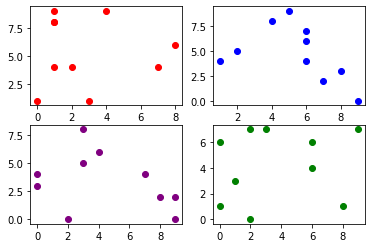

In [546]:
fig, axs = plt.subplots(2, 2)
colours = np.array([['red', 'blue'], ['purple', 'green']])

for i in range(len(axs[0])):
    for j in range(len(axs[1])):
        axs[i, j].scatter(np.random.randint(10, size=10), np.random.randint(10, size=10), color=colours[i, j])

plt.show()

### Question 1 - 3x3 Grid

Plot 9 graphs in a 3x3 grid. Insert random data into each of the plots except for each of the plots on the diagonal from top left to bottom right. I.e. randomly fill all the graphs with a label $O$:

$$
\begin{bmatrix}
- & O & O \\
O & - & O \\
O & O & - \\
\end{bmatrix}
$$

You don't need to worry about colours but feel free to add them if you'd like.

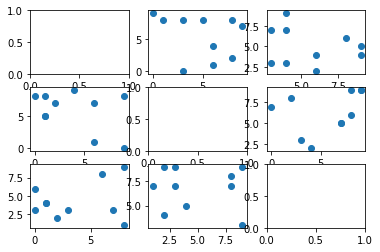

In [547]:
# Sample answer
fig, axs = plt.subplots(3, 3)

for i in range(len(axs[0])):
    for j in range(len(axs[1])):
        if i == j:
            continue
        
        axs[i, j].scatter(np.random.randint(10, size=10), np.random.randint(10, size=10))

### Question 2 - Generate some data

To explore 3D plots in matplotlib, we first need to create some 3D data. Create 3 variables `x`, `y`, and `z`, each with 100 values generated using a normal distribution. The values should be between -1 and 1

In [548]:
# Sample answer
min, max = -1, 1
num_values = 100

x, y, z = np.split(np.random.uniform(low=min, high=max, size=num_values*3), 3)

## Scatter Plots
Plotting in 3D is very similar to in 2 dimensions in matplotlib. Using the x, y anf z values assigned above, we can plot this data on a [scatter plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) to visualise the positions of the 100 points in 3D space.

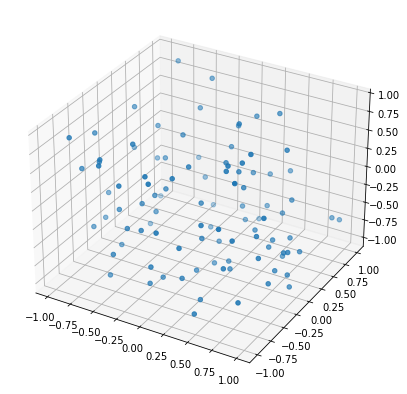

In [549]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)
plt.show()

### Question 4 - Draw the vectors

Especially when working with vectors, it can be very useful to show these on a 3D plot. Draw a line on this 3D plot from (0, 0) to the first point described by x, y, and z. Now draw a line from (0, 0) to the second point described by x, y, and z.

*Extension*:

Too easy? Calculate the angle (in radians or degrees) [between the the two vectors](https://www.omnicalculator.com/math/angle-between-two-vectors) you have just plotted using only numpy and base python functions.

Hint: You can use [np.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html) - the linear algebra sub-package for numpy

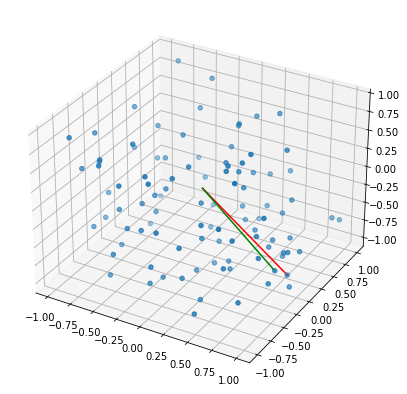

Radians: 0.08485201310864046
Degrees: 4.861662234313835


In [550]:
# Sample answer
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)

x_1, x_2 = x[:2]
y_1, y_2 = y[:2]
z_1, z_2 = z[:2]

ax.plot((0, x_1), (0, y_1), (0, z_1), color='red')
ax.plot((0, x_2), (0, y_2), (0, z_2), color='green')

plt.show()

# Extension sample answer
unit_vector1 = [x_1, y_1, z_1] / np.linalg.norm([x_1, y_1, z_1])
unit_vector2 = [x_2, y_2, z_2] / np.linalg.norm([x_2, y_2, z_2])
angle = np.arccos(np.dot(unit_vector1, unit_vector2))

print(f'Radians: {angle}')
print(f'Degrees: {np.degrees(angle)}')

## Surface Plots

Quite often your data may represent a surface. Normal distributions appear frequently in many applications, especially in fields such as machine-learning. We will now plot a multivariate normal distribution.

If you aren't familiar with [multivariate normal distributions](https://www-sigproc.eng.cam.ac.uk/foswiki/pub/Main/PB404/multivariate_normals.pdf), we will briefly cover them here. Univariate normal distributions make use of two parameters, mean ($\mu$) and variance ($\sigma^2$). Using just these two parameters, the distribution can be plotted using the following formula:

$$
f(x) = \frac{1}{\sigma\sqrt{2 \pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}
$$

By defining just $\mu$ and $\sigma$, we can define the form function for some variable $x$. Multivariate normal distributions add another dimension with variable $y$. This variable will also have its own mean $\mu_y$ and variance $\sigma^2_y$. To plot this data, we need to take into account the [covariance](https://www.investopedia.com/ask/answers/041515/what-difference-between-variance-and-covariance.asp) between the variables, that is the joint variability between $x$ and $y$. This logic can be extended into any number of dimensions with any number of random variables but beyond bivariate distributions, we can no longer visualise them.

We will use scipy to calculate the multivariate normal for us using our multi-variate mean $\begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}$ and covariance $\begin{bmatrix} \sigma^2_x & 0 \\ 0 & \sigma^2_y \end{bmatrix}$

### Question 4 - Experiment with each variable and try and predict what will happen to the plot

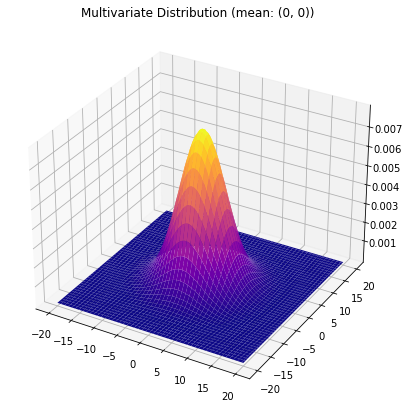

In [551]:
# Define our variables for our function
mu_x = 0
var_x = 20

mu_y = 0
var_y = 20

# Create a set of points to plot
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

# Define the coordinates of x and y (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Calculate the bivariate distribution using the multivariate mean and covariance
dist = stats.multivariate_normal([mu_x, mu_y], [[var_x, 0], [0, var_y]])

# Plot from the probability density function
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.set_title(f'Multivariate Distribution (mean: ({mu_x}, {mu_y}))')

ax.plot_surface(X, Y, dist.pdf(pos), cmap='plasma')
plt.show()

# Linear Regression

When dealing with data, particularly from experiments, we may want to fit a line to the distribution to learn the relationship and possibly predict future outcomes with untested variables. The simplest form of this is using linear regression to draw a straight line of best fit for a distribution of data. This section of the notebook will cover how to implement linear regression in a number of situations.

## Import the Data

For this example, the gold medal results of olympic track and field events will be used to show linear regression in action. The medal winning times for the men's marathon from each olympic games between 1896 and 2016 will be used to draw a line of best fit. The original dataset can be found [here](https://www.kaggle.com/datasets/jayrav13/olympic-track-field-results/discussion/272523).

In [552]:
df = pd.read_csv('https://raw.githubusercontent.com/wrmthorne/linear-regression/main/olympic_data.csv', encoding='unicode_escape')

# Print some information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2394 non-null   object 
 1   Event        2394 non-null   object 
 2   Location     2394 non-null   object 
 3   Year         2394 non-null   int64  
 4   Medal        2394 non-null   object 
 5   Name         2164 non-null   object 
 6   Nationality  2394 non-null   object 
 7   Result       2394 non-null   object 
 8   Wind         12 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 168.5+ KB
None


### Question 5 - Extracting the correct data

Extract only the Women's 100m results from the full list of data and keep only the 'Year' and 'Result' columns. We are only interested in plotting the year against the time achieved for each year. name the variable `data`.

Hint: You can get a list of all of the olympic events in this dataset using df.Event.unique()

In [553]:
# Sample answer
data = df[['Year', 'Result']].loc[df.Event == '100M Women']

## Preparing the data

Now that we have our subset of our data, we can view the dataset. Within the data, we can see that there are some missing values. These will cause problems when trying to plot and define our line of best fit. Normally removing missing values in pandas made simple by using `df.dropna()` but this dataset has the missing values stored as a string `'None'`. We can use a work-around to resolve this. `df.mask` replaces values in a dataframe where a condition is true so we can use it to set the value to `NaN` where `'None'` is present and then run `.dropna()`. More can be found out abour df.mask [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html)

In [554]:
data = data.mask(df.eq('None')).dropna()

Since we are only mapping the function of two columns, we can use a function of the form:

$$
y = mx + c
$$

As our independent variable is the year and our dependent variable is the result, we assign $x$ to year and $y$ to time.

In [555]:
# Sort data by ascending years
data = data.sort_values(by=['Year'])

# Assign x and y and shape them into a column vector
x = np.array(data.Year.values).astype(float)
y = np.array(data.Result.values).astype(float)

## Inspecting the Data

Now that we have our data in a computer interpretable format, we can visualise the data to inspect what we expect the result to look like. We can plot the data on a scatter plot and manully visualise where a line of best fit might pass.

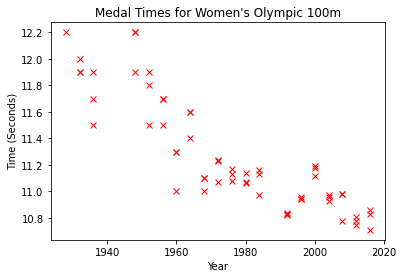

In [556]:
plt.plot(x, y, 'rx')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.show()

 ## Fitting the Data

This is finally where linear regression comes into play. Linear regression uses linear algebra to mathematically solve for variables $m$ and $c$ in the above formula to minimise the sum of squares error:

$$
E(m, c) = \sum^{n}_{i=1}(y_i - (mx_i + c))^2
$$

We can simplify this whole process of calculating a line of best fit into one line of code using the [stats.lingress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) method from [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html).

If you are interested in the maths of linear regression, it will be covered in the extension section of this notebook where we will manually implement linear regression to better understand how it functions.

In [557]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

The important returned parameters for our function $y = mx + c$ are slope and intercept, representing $m$ and $c$, respectively. r_value represents the [correlation coefficient](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/), p_value is a [two-sided p test](https://stattrek.com/regression/slope-test.aspx) and the std_err is the standard error of the estimate, which is of the form:

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

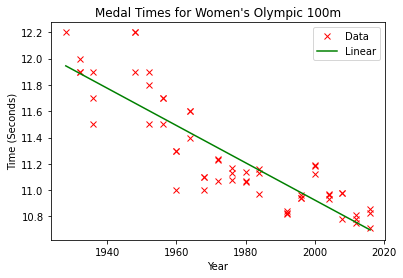

In [558]:
y_lin = slope * x + intercept

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, y_lin, 'g-', label='Linear')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

### Question 6 - Putting it all together

Repeat the steps above to plot the data of the `Mens Marathon`. Then calculate and plot the line of best fit.

The marathon results are stored in string format in the dataset. We therefore need to convert it to a numerical form that can be use in arithmetic. As times are represented in a number of different ways in this dataset, we will use [regular expressions](https://docs.python.org/3/library/re.html) for convert them to an integer number of seconds. If they were all in the same format, we could use a library such as [time](https://docs.python.org/3/library/time.html).

Use `df.apply` to convert all rows into seconds

In [559]:
# Takes string time format and converts time into integer seconds
def convert_to_seconds(x):
    parsed_x = re.search(r'((?P<hours>\d+).(?P<minutes>\d+).(?P<seconds>\d+))', x)
    hours    = int(parsed_x.group('hours')) * 60 * 60
    minutes  = int(parsed_x.group('minutes')) * 60
    seconds  = int(parsed_x.group('seconds'))
    return hours + minutes + seconds

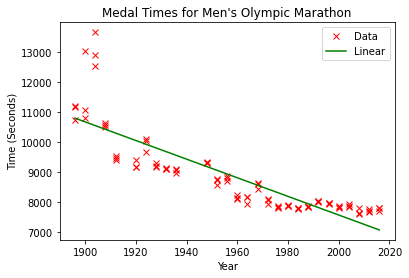

In [560]:
# Sample answer
data = df[['Year', 'Result']].loc[df.Event == 'Marathon Men'].sort_values(by=['Year'])
data.Result = data.Result.apply(lambda x: convert_to_seconds(x))

x = np.array(data.Year.values).astype(float)
y = np.array(data.Result.values).astype(float)

slope, intercept, _, _, _ = stats.linregress(x, y)

y_lin = slope * x + intercept

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, y_lin, 'g-', label='Linear')
plt.title('Medal Times for Men\'s Olympic Marathon')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

## Multiple Parameters

As mentioned before, many real world experiments will not just seek to describe the relationship between two parameters. Instead many will seek to explore 3 or mode parameters to make a prediction. The following work will do just this.

The data for this section will come from a spreadsheet with multiple sheets within it. Once again, Pandas comes to the rescue as we make use of inbuilt functions to read in the data and process it further with our models. This example contains 3 sheets where each represents the outcome of the same experiment. A copy of the spreadsheet can be downloaded [here](https://github.com/wrmthorne/linear-regression/blob/main/experiment_data.xlsx) if you wan't to view it.

In [561]:
xlsx = pd.ExcelFile('https://raw.githubusercontent.com/wrmthorne/linear-regression/main/experiment_data.xlsx')
sheet_names = xlsx.sheet_names

run1 = pd.read_excel(xlsx, sheet_names[0], index_col=0)
run2 = pd.read_excel(xlsx, sheet_names[1], index_col=0)
run3 = pd.read_excel(xlsx, sheet_names[2], index_col=0)
print(run1)

       a     b     c      d
1   2.44  5.07  3.48  7.926
2   2.26  5.00  3.50  7.756
3   2.30  5.12  3.53  7.912
4   2.67  5.20  3.49  8.198
5   2.29  5.10  3.48  7.866
6   2.18  5.00  3.50  7.708
7   2.25  5.18  3.51  7.934
8   2.30  5.22  3.52  8.008
9   2.40  5.30  3.47  8.128
10  2.60  5.11  3.50  8.070


Each sheet contains 10 rows. Columns a, b, and c represent the independent variables and d is the dependent variable. SciPy is limited to 2 variables when calculating a line of best fit so we will now introduce our second method of calculating a line of best fit using [linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from [sklearn](https://scikit-learn.org/stable/index.html). The sklearn model is slightly mode complex to use but is far more flexible in what it can do.

### Question 7 - Preparing the data

Once again, we need to prepare out data for regression. For run1, split our independent variables `a`, `b`, and `c` into a numpy array with shape (10, 3) named $X$ and our dependent variable `d` into a numpy array named $y$ with shape (10,). Note here we use capital $X$ to denote a matrix and lower case $y$ to denote a vector.

In [562]:
# Sample answer
X = np.array(run1[['a', 'b', 'c']], dtype=float)
y = np.array(run1['d'], dtype=float)

We can now fit our sklearn LinearRegression model on our prepared data. This is also very simple:

In [563]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

slope = lin_reg.coef_
intercept = lin_reg.intercept_

One of the benefits of sklearn is that it is built for machine learning so extracting predictions from it is very simple. We can see by plotting our `y` and `y_pred` values that there is a perfect linear relationship between out independent variables and our dependent variable.

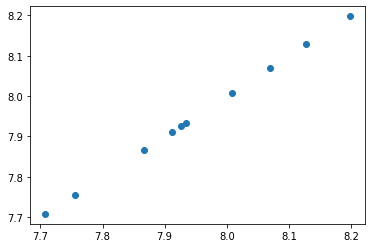

In [564]:
# Make predictions of our input set
y_pred = lin_reg.predict(X)

plt.scatter(y, y_pred)
plt.show()

### Question 8 - Meta linear regression

Use the scipy liner regression tool to draw a line of best fit for this data.

Hint: Create a linear space for y and y_pred - it will be useful later

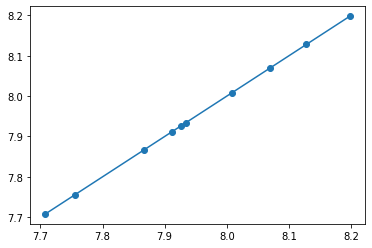

In [565]:
# Sample answer
plt.scatter(y, y_pred)
x_space = np.linspace(y.min(), y.max())
y_space = np.linspace(y_pred.min(), y_pred.max())

slope, intercept, _, _, _ = stats.linregress(y, y_pred)
fx_space = x_space * slope + intercept

plt.plot(fx_space, y_space)
plt.show()

### Question 9 - Repeat the experiment

Create 3 subplots, one for each run. For each run, fit an sklearn model and plot `y` vs. `y_pred`. The use the scipy implementation to draw a line of best fit on the same plot.

Do you notice anything special about any of the runs?

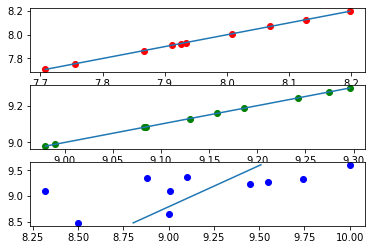

In [566]:
# Sample answer
fig, axs = plt.subplots(3, 1)
colours = ['red', 'green', 'blue']

for i, run in enumerate([run1, run2, run3]): 
    X = np.array(run[['a', 'b', 'c']])
    y = np.array(run['d'])

    model_ols = linear_model.LinearRegression()
    model_ols.fit(X, y)
    y_pred = model_ols.predict(X)
    axs[i].scatter(y, y_pred, color=colours[i])

    slope, intercept, _, _, _ = stats.linregress(y, y_pred)

    x_space = np.linspace(y.min(), y.max())
    y_space = np.linspace(y_pred.min(), y_pred.max())

    fx_space = x_space * slope + intercept

    axs[i].plot(fx_space, y_space)

plt.show()

## Non-Linear Line of Best Fit

Something to remember is that not all relationships between variables is linear. This is clear from our olympic data from before. One way to tackle this problem is by using a basis function. A basis function $\phi$ directly transforms the original input space $x$, meaning a set of linear parameters can still be used for $m$ and $c$, but a non-linear line of best fit can be represented. 

$$
y = mx + c
$$
$$
y = m\phi(x) + c
$$

Any function can be used as a basis function but a common basis function is polynomial:

$$
\phi{_j}(x_i^j)
$$
$$
\Phi(x) = x + x^2 + x^3 \dots + x^n
$$

We will repeat our Women's 100m experiment again, this time using a basis function to draw a line of best fit.

In [567]:
df = pd.read_csv('https://raw.githubusercontent.com/wrmthorne/linear-regression/main/olympic_data.csv', encoding='unicode_escape')
data = df[['Year', 'Result']].loc[df.Event == '100M Women'].mask(df.eq('None')).dropna()
data = data.sort_values(by=['Year'])

# Assign x and y and shape them into a column vector
x = np.array(data.Year.values, dtype=float).reshape(-1, 1)
y = np.array(data.Result.values, dtype=float).reshape(-1, 1)

We can now define our polynomial basis function which will convert our data into the desired form $\Phi$, specified above

In [568]:
def polynomial(x, num_basis=4):
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

X_basis = polynomial(x)
print(X_basis[:5])

[[1.00000000e+00 1.92800000e+03 3.71718400e+06 7.16673075e+09]
 [1.00000000e+00 1.93200000e+03 3.73262400e+06 7.21142957e+09]
 [1.00000000e+00 1.93200000e+03 3.73262400e+06 7.21142957e+09]
 [1.00000000e+00 1.93200000e+03 3.73262400e+06 7.21142957e+09]
 [1.00000000e+00 1.93600000e+03 3.74809600e+06 7.25631386e+09]]


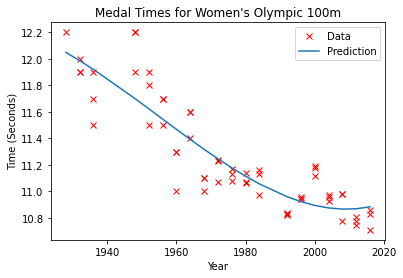

In [569]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_basis, y)
y_pred = lin_reg.predict(X_basis)

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, y_pred, label='Prediction')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

### Question 10 - Num Basis

What do you expect would happen if you set the number of basis to 1? What about 2? What about the number of elements in the dataset? 

Repeat the experiment above and find out. Are the results what you expected?

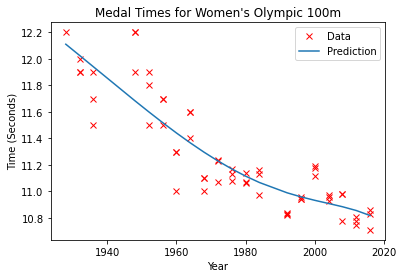

In [570]:
# Sample answer
X_basis = polynomial(x, num_basis=len(x))
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_basis, y)
y_pred = lin_reg.predict(X_basis)

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, y_pred, label='Prediction')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

## Extension: The Maths

There are `no questions` in this section but if you are interested in the maths of linear regression, this section will cover how to implement linear regression manually in numpy. This will also cover the underlying linear algebra involved and generally dig deeper into the topic. If you want every last step in the derivation of all of these formulas, they can be found in [this article](https://towardsdatascience.com/understanding-linear-regression-eaaaed2d983e) and in many other places online.

As stated before, the aim of linear regression is to algebraically solve for $m$ and $c$ in a function of the form:

$$
y = mx + c
$$

There are two ways of minimising the loss w.r.t $m$ and $c$. It can be solved using linear algebra (the method which will be covered here) or it can be performed iteratively, that is, by updating the values by a incremental amount ([learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)) at each iteration of a loop. This is known as [gradient descent](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) and is the primary algorithm used on extremely large models where there is too much data to store in memory at any one time to solve algebraically.

All standard models of linear regression will make use of matrix multiplication. If you haven't used matrices before, [khan academy](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:mat-intro/v/introduction-to-the-matrix) has a really good series on them. We will first cover how to use matrices in numpy.

In [571]:
# Define matrix A and matrix B (2D numpy arrays)
A = np.random.randint(1, 5, size=(4, 4))
B = np.random.randint(1, 5, size=(4, 4))

print(A, end='\n\n')
print(B)

[[1 1 4 3]
 [4 1 2 3]
 [2 4 1 1]
 [2 1 3 4]]

[[2 3 3 2]
 [2 3 4 1]
 [1 2 1 2]
 [1 4 2 4]]


The dot and outer products of matrices can be performed in numpy simply. Dot product can be performed using `np.dot()` (or `@` but it is very [slightly different](https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication) in some cases) and the outer product can be calculated with `np.outer()`

In [572]:
# np.dot() and @ are basically equivalent
print(np.dot(A, B), end='\n\n')
print(A @ B, end='\n\n')

print(np.outer(A, B))

[[11 26 17 23]
 [15 31 24 25]
 [14 24 25 14]
 [13 31 21 27]]

[[11 26 17 23]
 [15 31 24 25]
 [14 24 25 14]
 [13 31 21 27]]

[[ 2  3  3  2  2  3  4  1  1  2  1  2  1  4  2  4]
 [ 2  3  3  2  2  3  4  1  1  2  1  2  1  4  2  4]
 [ 8 12 12  8  8 12 16  4  4  8  4  8  4 16  8 16]
 [ 6  9  9  6  6  9 12  3  3  6  3  6  3 12  6 12]
 [ 8 12 12  8  8 12 16  4  4  8  4  8  4 16  8 16]
 [ 2  3  3  2  2  3  4  1  1  2  1  2  1  4  2  4]
 [ 4  6  6  4  4  6  8  2  2  4  2  4  2  8  4  8]
 [ 6  9  9  6  6  9 12  3  3  6  3  6  3 12  6 12]
 [ 4  6  6  4  4  6  8  2  2  4  2  4  2  8  4  8]
 [ 8 12 12  8  8 12 16  4  4  8  4  8  4 16  8 16]
 [ 2  3  3  2  2  3  4  1  1  2  1  2  1  4  2  4]
 [ 2  3  3  2  2  3  4  1  1  2  1  2  1  4  2  4]
 [ 4  6  6  4  4  6  8  2  2  4  2  4  2  8  4  8]
 [ 2  3  3  2  2  3  4  1  1  2  1  2  1  4  2  4]
 [ 6  9  9  6  6  9 12  3  3  6  3  6  3 12  6 12]
 [ 8 12 12  8  8 12 16  4  4  8  4  8  4 16  8 16]]


Matrices can have their inverse inverse and transpose applied

In [573]:
# Transposition
print(A, end='\n\n')
print(A.T, end='\n\n')

# Inversion
print(np.linalg.inv(A))

[[1 1 4 3]
 [4 1 2 3]
 [2 4 1 1]
 [2 1 3 4]]

[[1 4 2 2]
 [1 1 4 1]
 [4 2 1 3]
 [3 3 1 4]]

[[ 0.06666667  0.43333333 -0.03333333 -0.36666667]
 [-0.06666667 -0.18333333  0.28333333  0.11666667]
 [ 0.6         0.15       -0.05       -0.55      ]
 [-0.46666667 -0.28333333 -0.01666667  0.81666667]]


We can now show how summation across a formula is equivalent to matrix multiplication when use in a specific way. If we define a really large vector C and we want to find the sum of the sqares of all elements in C, the same operation can be achieved much faster using matrix multiplication:

$$
\sum_{i=1}^{n}c_i^2 = C^T \cdot C
$$

This difference may not seem important for a simple calculation like this but by using matrix multiplication, we avoid iteration which is a major bottle neck in computation

In [574]:
# Reduce the size if this cell takes more than a couple of seconds
C = np.random.randint(1, 5, size=10000000)

# Summation 
start_time = time.time()
summation = sum(C**2)
print(f'Summation: {time.time() - start_time:.4f}s')

# Matrix multiplication
start_time = time.time()
mat_mul = np.dot(C.T, C)
print(f'Matrix Multiplication: {time.time() - start_time:.4f}s')

print(f'Equivalent?: {summation == mat_mul}')

Summation: 0.6301s
Matrix Multiplication: 0.0062s
Equivalent?: True


Now that we have gone through the basics of matrices in numpy, we can start to look at how we can apply this to linear regression. First, we need to understand how we can convert objective function into a vectorised form. We can take our original objective function and stack the two parameters into a weight matrix $\mathbf{w}$:

$$
\mathbf{w} = \begin{bmatrix} c \\ m \end{bmatrix}
$$
$$
E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2
$$

In this format, we need $x$ to be in the design-matrix format, covered above. i.e.

$$
x_i = \begin{bmatrix} 1 \\ x_i \end{bmatrix} 
$$
$$
X = \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} 
$$

We can now define the function $f(x_i)$:

$$
f(x_i) = x_i^Tw
$$
$$
f(X;\mathbf{w}) = X\mathbf{w}
$$

Now, using the concept we covered above about matrix multiplication being equivalent to summation when performed in a particular manner, we can produce the following equation:

$$
E(\mathbf{w}) = (y - f(X;\mathbf{w}))^T(y-f(X;\mathbf{w}))
$$

If we expand everything out, we can now define our vectorised function of the form:

$$
E(\mathbf{w}) = (y - X\mathbf{w})^T(y-X\mathbf{w})
$$

The next step is to differentiate w.r.t $\mathbf{w}$ to algebraically solve and find the optimimum (where gradient is 0).

$$
\frac{dE\mathbf{w}}{d\mathbf{w}} = -2X^Ty + 2X^TX\mathbf{w}
$$

Here, we are exploiting the fact that $\mathbf{w}$ is the composite of $c$ and $m$ to perform the optimisation for both values at the same time:

$$
\frac{dE\mathbf{w}}{d\mathbf{w}} = \begin{bmatrix} \frac{\partial E(\mathbf{w})}{\partial c} \\ \frac{\partial E(\mathbf{w})}{\partial m} \end{bmatrix}
$$

When we set this value to 0, we can arrange the equation to be in the following form:

$$
X^TX\mathbf{w} = X^T\mathbf{y}
$$

With all of the heavy maths done, we can return to numpy. For solving the differential of our objective function w.r.t. $\mathbf{w}$, we can make use of the [np.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) method which solves systems of linear equations (if there is an exact solution) in the form we have now put our equation into. Taking our matrices A and B from above, we can solve for an arbitraty w based on the form:

$$
A\mathbf{w} = B
$$

In [575]:
# Automatic linear algebra solving
w = np.linalg.solve(A, B)

print(w)

[[ 0.6        -0.03333333  1.16666667 -0.96666667]
 [-0.1         0.28333333 -0.41666667  0.71666667]
 [ 0.9        -0.05        1.25       -0.95      ]
 [-0.7         0.98333333 -0.91666667  2.01666667]]


Putting everything together, we will repeat the linear regression example using the olympic data from before.

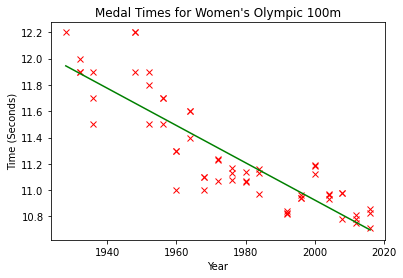

In [576]:
# Assign x and y and shape them into a column vector
x = np.array(data.Year.values).reshape(-1, 1).astype(float)
y = np.array(data.Result.values).reshape(-1, 1).astype(float)

# Create design matrix
X = np.hstack((np.ones_like(x), x))

# Solve system of equations
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

# Plot data and line of best fit
plt.plot(x, y, 'rx', label='Data')
plt.plot(x, np.dot(X, w), 'g-', label='Linear')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.show()

The manual implementation of linear regression is much more flexible than the scipy implementation at the cost of a little greater complexity in understanding. The implementation is closer to what sklearn uses, but once again, writing something yourself gives complete freedom to change it however you need. The numpy model also tends to run faster than both scipy and sklearn, as shown below:

In [577]:
# Number of iterations to average over
num_tests = 1000

numpy_times = []
for i in range(num_tests):
    start_time = time.time()
    X = np.hstack((np.ones_like(x), x))
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    numpy_times.append(time.time() - start_time)

print(f'Mean runtime of numpy over {num_tests} tests: {np.mean(numpy_times):.7f}s')

sklearn_times = []
for i in range(num_tests):
    start_time = time.time()
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(x, y)
    slope, intercept = lin_reg.coef_, lin_reg.intercept_
    sklearn_times.append(time.time() - start_time)

print(f'Mean runtime of sklearn over {num_tests} tests: {np.mean(sklearn_times):.7f}s')

# Reshape x and y to fit scipy requirements
x_scipi = x.reshape(-1)
y_scipi = y.reshape(-1)

scipy_times = []
for i in range(num_tests):
    start_time = time.time()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_scipi, y_scipi)
    scipy_times.append(time.time() - start_time)

print(f'Mean runtime of scipy over {num_tests} tests: {np.mean(scipy_times):.7f}s')

Mean runtime of numpy over 1000 tests: 0.0000203s
Mean runtime of sklearn over 1000 tests: 0.0001644s
Mean runtime of scipy over 1000 tests: 0.0001501s


To prove that this is an identical result to the SciPy and sklearn implementations, we can plot them on the same chart

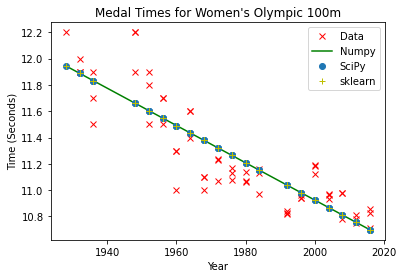

In [578]:
X = np.hstack((np.ones_like(x), x))
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_scipi, y_scipi)
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, np.dot(X, w), 'g-', label='Numpy')
plt.plot(x, (slope * x + intercept), 'o', label='SciPy')
plt.plot(x, y_pred, 'y+', label='sklearn')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

To enxtend this example to implement the basis functions discussed before, we can slightly modify the method.

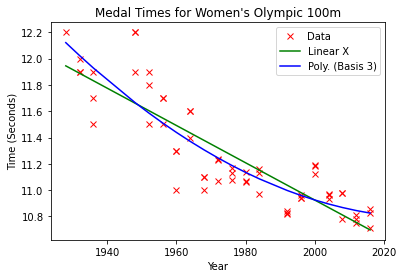

In [579]:
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    # Standardise input
    centre = np.mean(data_limits)
    span = np.ptp(data_limits)    # Get min and max values in an array
    z = x - centre
    z = 2*z/span

    # Calculate Phi(x) function
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

num_basis = 3
Phi = polynomial(x, num_basis=num_basis, data_limits=[x.min(), x.max()])
w_poly = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, np.dot(X, w), 'g-', label='Linear X')
plt.plot(x, np.dot(Phi, w_poly), 'b-', label=f'Poly. (Basis {num_basis})')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.ylabel('Time (Seconds)')
plt.xlabel('Year')
plt.legend()
plt.show()

## Making a Prediction

In 2020, E. Thompson-Herah won the women's 100m with a time of 10.61s. Let's see how our predictions line up with that

In [580]:
year = 2020

true_time = 10.61
print(f'True Time: {true_time}s')

linear_pred = np.dot(np.array([1, 2020]).T, w)
print(f'Linear prediction: {linear_pred.item():.2f}s\n\tError: {true_time - linear_pred.item():.2f}s')

basis_year = polynomial(np.array([year]), num_basis=num_basis, data_limits=[x.min(), 2020])
basis_pred = np.dot(basis_year, w_poly)
print(f'Basis {num_basis} prediction: {basis_pred.item():.2f}s\n\tError: {true_time - basis_pred.item():.2f}s')

True Time: 10.61s
Linear prediction: 10.64s
	Error: -0.03s
Basis 3 prediction: 10.81s
	Error: -0.20s
